<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/KNNImputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv', header = None, na_values='?')

In [2]:
print(df.head)

<bound method NDFrame.head of       0   1        2     3      4     5    6   ...   21   22  23     24  25  26  27
0    2.0   1   530101  38.5   66.0  28.0  3.0  ...  NaN  2.0   2  11300   0   0   2
1    1.0   1   534817  39.2   88.0  20.0  NaN  ...  2.0  3.0   2   2208   0   0   2
2    2.0   1   530334  38.3   40.0  24.0  1.0  ...  NaN  1.0   2      0   0   0   1
3    1.0   9  5290409  39.1  164.0  84.0  4.0  ...  5.3  2.0   1   2208   0   0   1
4    2.0   1   530255  37.3  104.0  35.0  NaN  ...  NaN  2.0   2   4300   0   0   2
..   ...  ..      ...   ...    ...   ...  ...  ...  ...  ...  ..    ...  ..  ..  ..
295  1.0   1   533886   NaN  120.0  70.0  4.0  ...  NaN  3.0   2   3205   0   0   2
296  2.0   1   527702  37.2   72.0  24.0  3.0  ...  3.3  3.0   1   2208   0   0   1
297  1.0   1   529386  37.5   72.0  30.0  4.0  ...  NaN  2.0   1   3205   0   0   2
298  1.0   1   530612  36.5  100.0  24.0  3.0  ...  3.4  1.0   1   2208   0   0   1
299  1.0   1   534618  37.2   40.0  20.0  NaN 

In [3]:
# summarize the null value
for i in range(df.shape[1]):
  n_miss = df[[i]].isnull().sum()
  perc = n_miss/df.shape[0]*100
  print('> %d Missing: %d (%.1f%%)' %(i,n_miss,perc))

> 0 Missing: 1 (0.3%)
> 1 Missing: 0 (0.0%)
> 2 Missing: 0 (0.0%)
> 3 Missing: 60 (20.0%)
> 4 Missing: 24 (8.0%)
> 5 Missing: 58 (19.3%)
> 6 Missing: 56 (18.7%)
> 7 Missing: 69 (23.0%)
> 8 Missing: 47 (15.7%)
> 9 Missing: 32 (10.7%)
> 10 Missing: 55 (18.3%)
> 11 Missing: 44 (14.7%)
> 12 Missing: 56 (18.7%)
> 13 Missing: 104 (34.7%)
> 14 Missing: 106 (35.3%)
> 15 Missing: 247 (82.3%)
> 16 Missing: 102 (34.0%)
> 17 Missing: 118 (39.3%)
> 18 Missing: 29 (9.7%)
> 19 Missing: 33 (11.0%)
> 20 Missing: 165 (55.0%)
> 21 Missing: 198 (66.0%)
> 22 Missing: 1 (0.3%)
> 23 Missing: 0 (0.0%)
> 24 Missing: 0 (0.0%)
> 25 Missing: 0 (0.0%)
> 26 Missing: 0 (0.0%)
> 27 Missing: 0 (0.0%)


# Nearest Neighbor Imputation with KNNImputer

In [9]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
# load dataset
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv', header = None, na_values='?')
# split data into input and output
data = df.values
xi = [i for i in range(data.shape[1]) if i!=23]
X, y = data[:,xi], data[:,23]
# summarize total missing
print('Missing: %d' %sum(np.isnan(X).flatten()))
# define imputer
imputer = KNNImputer()
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# summarize total missing
print('Missng: %d' % sum(np.isnan(Xtrans).flatten()))

Missing: 1605
Missng: 0


# Model evaluation

In [15]:
# evaluate knn imputation and random forest for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
# load dataset
df = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv', header = None, na_values='?')
# split into input and output elements
data = df.values
ix = [i for i in range(data.shape[1]) if i!=23]
X, y = data[:,ix], data[:,23]
# define modeling pipeline
model = RandomForestClassifier()
imputer = KNNImputer()
pipeline = Pipeline(steps=[('i', imputer),('m', model)])
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluation model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.867 (0.054)


# KNN with different number of *k* Neighbors

>1 0.858 (0.049)
>3 0.856 (0.053)
>5 0.859 (0.057)
>7 0.869 (0.057)
>9 0.860 (0.055)
>15 0.867 (0.054)
>18 0.863 (0.057)
>21 0.856 (0.054)


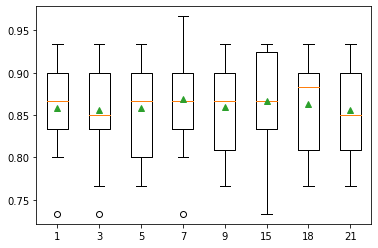

In [19]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
df = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv',header=None, na_values='?')
# split into input and output elements
data = df.values
xi = [i for i in range(data.shape[1]) if i!=23]
X, y = data[:,xi], data[:,23]
# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
for s in strategies:
  model = RandomForestClassifier()
  imputer = KNNImputer(n_neighbors=int(s))
  pipeline = Pipeline(steps=[('i',imputer),('m', model)])
  #define model evaluation 
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  #evaluation model
  scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  results.append(scores)
  print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparision
pyplot.boxplot(results, labels = strategies, showmeans=True)
pyplot.show()  


# KNNImputer transform When Making a Prediction

In [18]:
from numpy import nan
# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, 5, 45.00,
8.40, nan, nan, 2, 11300, 00000, 00000, 2]

In [23]:
# knn imputation strategy and prediction for the horse colic dataset
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
# load dataset
df = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv',header=None, na_values='?')
# split data into input and output elements
data = df.values
ix = [i for i in range(data.shape[1]) if i!=23]
X, y = data[:,ix], data[:,23]
# create model pipeline
model = RandomForestClassifier()
impute = KNNImputer(n_neighbors=21)
pipeline = Pipeline(steps=[('i', impute),('m', model)])
# fit the model
pipeline.fit(X, y)
# make a prediction
yhat = pipeline.predict([row])
# summarize prediction 
print('Predicted Class: %d' % yhat[0])


Predicted Class: 2
